# Assignment 2 - Spatial Data

***Student Name:***

Ziwei Zhang

***Student Number:***

s2716240

In this assignment, you will be asked to use your knowledge about spatial correlation functions and spatial weights to visualize several world bank data sets. Please be aware that your code is only part of the grade (60%). The actual visualization as well as your analytical approach in interpretation of the results will be graded as well (40%). The dealine for this assignment is **on 26th of October 2021, 23:55 PM**.


**Submit the notebook, and a html version of your notebook via the github Classroom repo**. Please use your studentnumber as file name (i.e. s145678.ipynb and s145678.html). If you do not include both the notebook and the html file, your submission will NOT be considered.
The easiest way to covert your notebook to an html file is to open it via jupyter notebook and then select File -> Download as -> HTML.  
**Please try to do this multiple days before the deadline so we can help you if you run into problems!**

Tasks:

    1) select 2 SDGs 
    2) formulate your research questions 
    3) transform data into weight matrices, make Moran's plots and interpret them
    4) display data in choropleth maps 
    5) answer your research questions in a short summary
 

In [1]:
#! pip install pysal
#! pip install geopandas

In [1]:
import seaborn as sns
import pandas as pd
import libpysal as ps
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

/home/vscode/.local/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


## Task 1: Sustainable Development Goals & Shapefiles

On this website: https://www.un.org/sustainabledevelopment/sustainable-development-goals/ the UN summarizes their sustainable development goals (SDGs). 

Select two goals to work on for this assignment.


***I will be working on these two goals:***
    

- <font color='red'>SDG 7: Affordable and Clean Energy</font> : Ensure access to affordable, reliable, sustainable and modern energy.
- <font color='red'>SDG 15: Life on Land</font> : Ensure the conservation, restoration and sustainable use of terrestrial and inland freshwater ecosystems and their services.

***Link to shapefiles:***

https://open.africa/dataset/africa-shapefiles

***Year shapefiles were created:***


April 20, 2020, 4:54 PM (UTC+02:00)

***Motivation for selecting the shapefile:***

This shapefile contains the latest data from 2020 and also regarded South Sudan as a new generation country, which could be more representative for analysing nowadays SDG tasks. Besides, the latest data can also help us to avoid the defects from old borders of the countries due to history-changing. 

In [2]:
import geopandas as gpd
shapefile = '/workspaces/assignment-2-BraydenZhang/Africa_shapefile_data/afr_g2014_2013_0.shp'

# Read shapefile using Geopandas
imd = gpd.read_file(shapefile)

# Index it on original the daraframe index
imd.index.name = 'Daraframe_ID'

# Display summary
# imd.info()
# Check the coordinate reference system
# imd.crs

# show all atrributes.  150: Madagascar
imd.head()

,ADM0_CODE,ADM0_NAME,CONTINENT,ISO3,ISO2,UNI,UNDP,FAOSTAT,GAUL,RIC_ISO3,...,CRA,ECOWAS,IGAD,IOC,SADC,CICOS,ICPAC,BDMS,MOI,geometry
Daraframe_ID,,,,,,,,,,,,,,,,,,,,,
0,6,Sudan,Africa,SDN,SD,729.0,SUD,276.0,6.0,ICPAC-SDN,...,0,0,4,0,0,0.0,14.0,0.0,NaN,"MULTIPOLYGON (((38.58148 18.02542, 38.58203 18..."
1,8,Angola,Africa,AGO,AO,24.0,ANG,7.0,8.0,BDMS-AGO,...,0,0,0,0,6,0.0,0.0,16.0,NaN,"MULTIPOLYGON (((11.79481 -16.81925, 11.79375 -..."
2,29,Benin,Africa,BEN,BJ,204.0,BEN,53.0,29.0,CRA-BEN,...,13,3,0,0,0,0.0,0.0,0.0,NaN,"MULTIPOLYGON (((1.86343 6.28872, 1.86292 6.288..."
3,35,Botswana,Africa,BWA,BW,72.0,BOT,20.0,35.0,BDMS-BWA,...,0,0,0,0,6,0.0,0.0,16.0,NaN,"POLYGON ((25.17447 -17.77881, 25.18476 -17.783..."
4,42,Burkina Faso,Africa,BFA,BF,854.0,BKF,233.0,42.0,CRA-BFA,...,13,3,0,0,0,0.0,0.0,0.0,NaN,"POLYGON ((-0.45567 15.08082, -0.45411 15.07937..."


<AxesSubplot:>

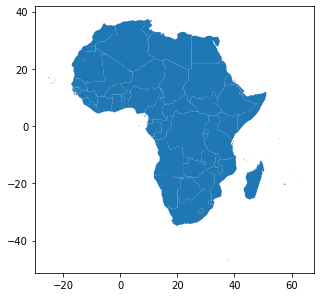

In [3]:
#imb = gdf['geometry']
imd.plot(figsize=(5, 5))

In [4]:
import libpysal as ps
# queen contiguity
w_queen = ps.weights.Queen.from_shapefile(shapefile) # do not pass idVariable
w_queen
# rook contiguity
# w_rook = ps.weights.Rook.from_shapefile(shapefile)
# w_rook

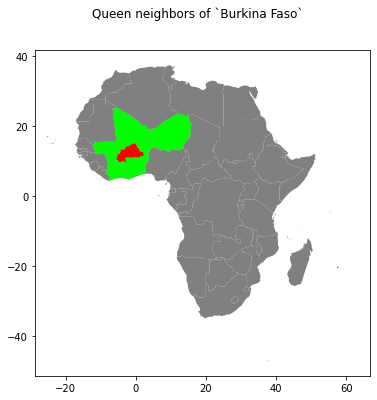

In [5]:
# Setup figure
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot base layer of polygons
imd.plot(ax=ax, facecolor='gray', linewidth=0.1)
# Select focal polygon
focus = imd.loc[[4], ['geometry']]
# Plot focal polygon
focus.plot(facecolor='red', alpha=1, linewidth=0, ax=ax)
# Plot neighbors
neis = imd.loc[w_queen[4], :]
neis.plot(ax=ax, facecolor='lime', linewidth=0)
# Title
f.suptitle("Queen neighbors of `Burkina Faso`")
# Style and display on screen
# ax.set_axis_off()
plt.axis('equal')
plt.show()

------------------------------------------------------------------------------------------------------
**For Island adjacent countries**

Besides, In order to find the neighbors for island countries, I tried to use Pysal's built-in functions like Queen, Rook and KNN but all of these functions provide a empty reult when the observation object is an island country, such like 'Madagascar'. That is because these countries are surrounded by the sea, without any land borders with other countries, so there is no weights in the matrics.  Therefore I choose to caculate the centorid distance manually for islands countries and find the most 7 nearlest countries between these islands's centorid to other countries's centorid 

ie. knn7_from_pts:

In [6]:
knn7 = ps.weights.KNN.from_shapefile(shapefile, k=7)
''' 
# KNN method : return error find neighbors for Madagascar island
knn7.neighbors[26]  

# queen and rook method : return NULL find neighbors for Madagascar island
w_queen[26]
w_rook[26]
'''

' \n# KNN method : return error find neighbors for Madagascar island\nknn7.neighbors[26]  \n\n# queen and rook method : return NULL find neighbors for Madagascar island\nw_queen[26]\nw_rook[26]\n'

In [7]:
# Explore all islands names
island_id = w_queen.islands
for i_name in island_id:
    print(i_name,imd.at[i_name,'ADM0_NAME'])

6 Cape Verde
9 Comoros
26 Madagascar
30 Mauritius
36 Seychelles
48 Abyei
52 Sao Tome and Principe
57 Egypt
58 Ilemi triangle


In [8]:
# Extract centroids 
cents = imd.centroid
# Extract coordinates into an array
pts = np.array([(pt.x, pt.y) for pt in cents])
# Compute KNN weights
knn7_from_pts = ps.weights.KNN.from_array(pts, k=7)
knn7_from_pts

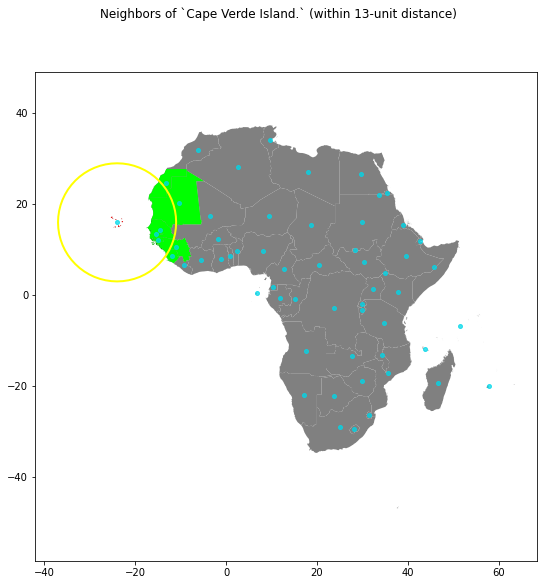

In [9]:
'''plot the island neighbors'''
f, ax = plt.subplots(1, figsize=(9, 9))
imd.plot(ax=ax, facecolor='gray', linewidth=0.1)
# 6 is ID for Cape Verde island . also can try 26 ,30, 36 etc other island countries.
focus = imd.loc[[6], ['geometry']]   
focus.plot(facecolor='red', alpha=1, linewidth=0, ax=ax)
neis = imd.loc[knn7_from_pts[6], :]
neis.plot(ax=ax, facecolor='lime', linewidth=0)
# Plot 13 unit km buffer
buf = focus.centroid.buffer(13)
buf.plot(edgecolor='yellow', alpha=1, fc="none", lw=2, ax=ax)
pts = np.array([(pt.x, pt.y) for pt in imd.centroid])
ax.plot(pts[:, 0], pts[:, 1], color='#00d8ea', 
        linewidth=0, alpha=0.75, marker='o', markersize=4)
f.suptitle("Neighbors of `Cape Verde Island.` (within 13-unit distance)")
plt.axis('equal')
plt.show()

## Task 2: Research Questions & Data Sources

***1st research question:***



Using <font color='red'>**'Accessing to clean fuels and technolohies for cooking(% of population)'** </font>a proxy for the development of <font color='red'>**SDG 7**</font>, how do the West-African Countries fare compared to the rest of Africa?

***2nd research question:***

Using <font color='red'>**'Bird species, threatened'** </font>a proxy for the development of <font color='red'>**SDG 15**</font>, how do the South-African Countries fare compared to the rest of Africa?

***Links to data:***

For 1st question: https://databank.worldbank.org/reports.aspx?dsid=46&series=EG.CFT.ACCS.ZS#  
(Year 2018)

For 2st question: https://databank.worldbank.org/reports.aspx?dsid=46&series=EG.CFT.ACCS.ZS#  
(Year 2016)

In [64]:
# drop useless colunms
imd_concise = imd.drop(['ADM0_CODE','CONTINENT','ISO2','UNI','UNDP','FAOSTAT','GAUL','RIC_ISO3',
'CRA','ECOWAS','IGAD','IOC','SADC','CICOS','ICPAC','BDMS','MOI','REC_ISO3','AFR','CEMAC','CILSS'], axis=1)
imd_concise.head()

,ADM0_NAME,ISO3,geometry
Daraframe_ID,,,
0,Sudan,SDN,"MULTIPOLYGON (((38.58148 18.02542, 38.58203 18..."
1,Angola,AGO,"MULTIPOLYGON (((11.79481 -16.81925, 11.79375 -..."
2,Benin,BEN,"MULTIPOLYGON (((1.86343 6.28872, 1.86292 6.288..."
3,Botswana,BWA,"POLYGON ((25.17447 -17.77881, 25.18476 -17.783..."
4,Burkina Faso,BFA,"POLYGON ((-0.45567 15.08082, -0.45411 15.07937..."


In [65]:
# read my SDG world bank data
birds = pd.read_csv('/workspaces/assignment-2-BraydenZhang/SDG_data/bird_threatened.csv', names=['Country_Name', 'Bird_Threatened_Value'], header=None)
energy = pd.read_csv('/workspaces/assignment-2-BraydenZhang/SDG_data/clean_energy_processed.csv', names=['Country_Name', 'Clean_Energy_Value'], header=None)

In [66]:
# create a new merged dataframe by using SGD data
imd_merged = pd.concat([imd_concise, birds['Bird_Threatened_Value'], energy['Clean_Energy_Value']], axis=1)
imd_merged[['Bird_Threatened_Value']].astype(float)
imd_merged[['Clean_Energy_Value']].astype(float)
imd_merged.index.name = 'Daraframe_ID'
imd_merged.head()
#print('change NaN to 0 complete!')

,ADM0_NAME,ISO3,geometry,Bird_Threatened_Value,Clean_Energy_Value
Daraframe_ID,,,,,
0,Sudan,SDN,"MULTIPOLYGON (((38.58148 18.02542, 38.58203 18...",26.0,41.29
1,Angola,AGO,"MULTIPOLYGON (((11.79481 -16.81925, 11.79375 -...",32.0,48.05
2,Benin,BEN,"MULTIPOLYGON (((1.86343 6.28872, 1.86292 6.288...",12.0,6.44
3,Botswana,BWA,"POLYGON ((25.17447 -17.77881, 25.18476 -17.783...",16.0,64.08
4,Burkina Faso,BFA,"POLYGON ((-0.45567 15.08082, -0.45411 15.07937...",12.0,8.93


In [68]:
print ( type(imd_merged.iat[0,4]) )
print( imd_merged.shape )
print( len(imd_merged) )

<class 'numpy.float64'>
(59, 5)
59


In [69]:
# drop all NaN entities
imd_dropNaN = imd_merged.dropna(axis=0)
imd_dropNaN.shape

(43, 5)

## Task 3: Spatial Lag & Moran's Plot

In [93]:
# Using 3-NN for extract the neighbors
cents2 = imd_dropNaN.centroid
pts2 = np.array([(pt.x, pt.y) for pt in cents2])
w_knn = ps.weights.KNN.from_array(pts2, k=3)
w_knn

In [94]:
# Row-standardize the queen matrix
w_knn.transform = 'R'

**Compute spatial lag for 1st and 2nd research Questions ie. Birds_Threatened and Clean_Energy:**

In [95]:
# Compute spatial lag score for  `Birds_Threatened_Value`.
birds_spatial_lag_score = ps.weights.lag_spatial(w_knn, imd_dropNaN['Bird_Threatened_Value']) # Bird_Threatened_Value, Clean_Energy_Value
birds_spatial_lag_score[:10]

array([19.33333333, 22.66666667, 16.        , 35.        , 16.        ,
       11.33333333, 22.66666667, 23.        , 16.33333333, 25.66666667])

In [96]:
# Compute spatial lag score for  `Clean_Energy_Value`.
energy_spatial_lag_score = ps.weights.lag_spatial(w_knn, imd_dropNaN['Clean_Energy_Value']) # Bird_Threatened_Value, Clean_Energy_Value
energy_spatial_lag_score[:10]

array([ 6.69666667, 40.90333333, 12.45      , 52.        , 11.62      ,
       39.47333333, 22.08      , 31.25666667, 10.45      ,  7.39      ])

**Moran Plot Results:**

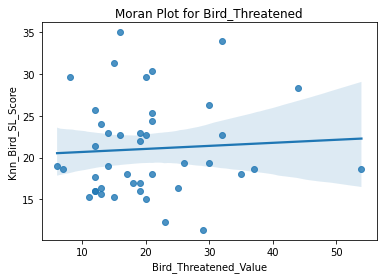

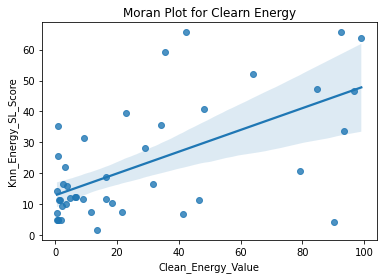

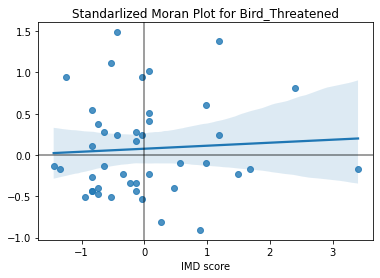

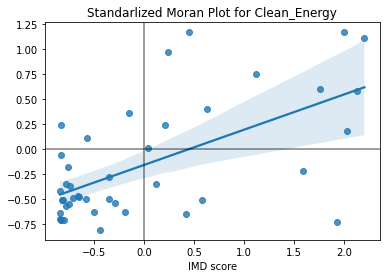

In [102]:
# update the dataframe
imd_dropNaN['Knn_Bird_SL_Score'] = birds_spatial_lag_score
imd_dropNaN['Knn_Energy_SL_Score'] = energy_spatial_lag_score

# Plot Morans Plot for Disaster
sns.regplot(x="Bird_Threatened_Value", y="Knn_Bird_SL_Score", data=imd_dropNaN)
plt.title('Moran Plot for Bird_Threatened')
plt.show()
# Plot Morans Plot for Disaster
sns.regplot(x="Clean_Energy_Value", y="Knn_Energy_SL_Score", data=imd_dropNaN)
plt.title('Moran Plot for Clearn Energy')
plt.show()

# Standardize the IMD scores
std_imd = (imd_dropNaN['Bird_Threatened_Value'] - imd_dropNaN['Bird_Threatened_Value'].mean()) / imd_dropNaN['Bird_Threatened_Value'].std()
std_w_imd = pd.Series(ps.weights.lag_spatial(w_knn, std_imd), index=std_imd.index)
f, ax = plt.subplots(1, figsize=(6, 4))
sns.regplot(x=std_imd, y=std_w_imd)
ax.set_xlabel("IMD score")
# Add vertical and horizontal lines
plt.title('Standarlized Moran Plot for Bird_Threatened')
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
plt.show()

# Standardize the IMD scores
std_imd = (imd_dropNaN['Clean_Energy_Value'] - imd_dropNaN['Clean_Energy_Value'].mean()) / imd_dropNaN['Clean_Energy_Value'].std()
std_w_imd = pd.Series(ps.weights.lag_spatial(w_knn, std_imd), index=std_imd.index)
f, ax = plt.subplots(1, figsize=(6, 4))
sns.regplot(x=std_imd, y=std_w_imd)
ax.set_xlabel("IMD score")
# Add vertical and horizontal lines
plt.title('Standarlized Moran Plot for Clean_Energy')
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
# Display
plt.show()

***Block Weights for Birds_Threatened and Clean_Energy:***

Block contiguity structures are relevant when defining neighbor relations based on membership in a regime. For example, all counties belonging to the same state could be defined as neighbors, in an analysis of all counties in the US.

Therefore, before we do the block weights we need artifictial assign a 'region' label for these africa countries, due to our research question is to explore question on 'eastern','southern','western', 'northern' or 'centertal' africa, so we manually assigned all lables to 5 class ie. :

**- 1 represent Eastern Africa.**


**- 2 represent Southern Africa.**


**- 3 represent Western Africa.**


**- 4 represent Northern Africa.**


**- 5 represent Centertal Africa.**

In [84]:
# read my SDG world bank data
region = pd.read_csv('/workspaces/assignment-2-BraydenZhang/SDG_data/region.csv', names=['Country_Name', 'Region'], header=None)

# create a new merged dataframe by using SGD data
imd_merged2 = pd.concat([imd_merged, region['Region']], axis=1)
imd_merged2[['Region']].astype(int)
imd_merged2.index.name = 'Daraframe_ID'
imd_merged2[:3]
#print('change NaN to 0 complete!')

,ADM0_NAME,ISO3,geometry,Bird_Threatened_Value,Clean_Energy_Value,Region
Daraframe_ID,,,,,,
0,Sudan,SDN,"MULTIPOLYGON (((38.58148 18.02542, 38.58203 18...",26.0,41.29,4
1,Angola,AGO,"MULTIPOLYGON (((11.79481 -16.81925, 11.79375 -...",32.0,48.05,5
2,Benin,BEN,"MULTIPOLYGON (((1.86343 6.28872, 1.86292 6.288...",12.0,6.44,3


In [85]:
# drop all NaN entities
imd_dropNaN2 = imd_merged2.dropna(axis=0)
imd_dropNaN2.shape

(43, 6)

In [86]:
# Note HERE!! : We use region as category to caculte the block weights! 
w_block = ps.weights.block_weights(imd_dropNaN2['Region']) 
# w_block.neighbors

In [87]:
w_block.transform = 'R'

In [88]:
# Then caculate the spatial lag for block weight
w_block_bird_score = ps.weights.lag_spatial(w_block, imd_dropNaN2['Bird_Threatened_Value'])
w_block_energy_score = ps.weights.lag_spatial(w_block, imd_dropNaN2['Clean_Energy_Value'])

print(w_block_bird_score)
print(w_block_energy_score)

[18.83333333 20.4        16.92857143 26.5        16.92857143 15.71428571
 23.6        21.8        16.         22.2        22.6        17.35714286
 19.66666667 17.33333333 17.28571429 16.14285714 16.92857143 16.35714286
 15.8        27.5        16.78571429 23.875      20.8        16.57142857
 16.42857143 27.         24.75       24.5        21.         16.28571429
 16.42857143 22.         20.4        21.75       23.8        16.85714286
 20.8        26.         26.125      20.66666667 20.16666667 22.8
 21.33333333]
[51.70166667  1.192      19.97714286 38.2475     19.79928571 18.79142857
 10.176      24.028      19.135      23.592      10.674      17.98071429
 55.86333333 57.99833333 14.78571429 18.88642857 20.32857143 20.34857143
 23.212      41.80625    20.38642857 46.14375    25.396      20.36857143
 17.11142857 34.59       45.79625    40.9825     58.265      20.08642857
 18.17642857  7.824      25.428      35.66375    10.632      19.95785714
 10.648      44.20375    42.62625    43.1466

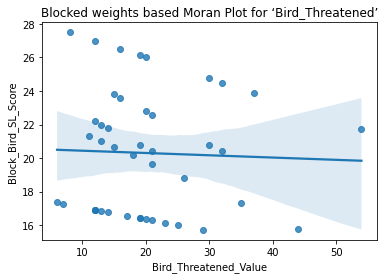

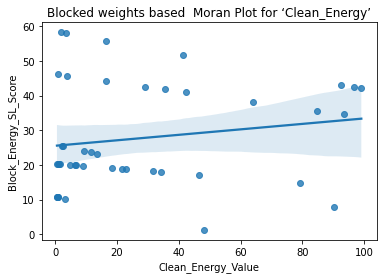

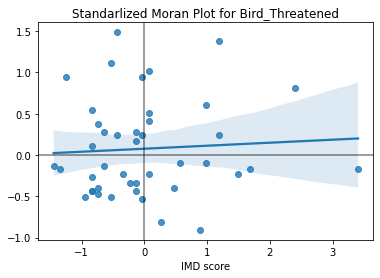

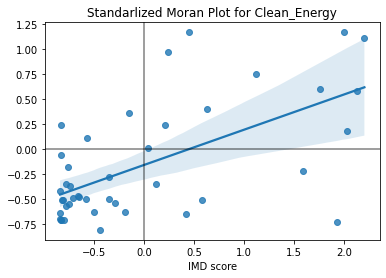

In [101]:
imd_dropNaN2['Block_Bird_SL_Score'] = w_block_bird_score
# Plot Morans Plot for Disaster
sns.regplot(x="Bird_Threatened_Value", y="Block_Bird_SL_Score", data=imd_dropNaN2)
plt.title('Blocked weights based Moran Plot for ‘Bird_Threatened’')
plt.show()

imd_dropNaN2['Block_Energy_SL_Score'] = w_block_energy_score
# Plot Morans Plot for Disaster
sns.regplot(x="Clean_Energy_Value", y="Block_Energy_SL_Score", data=imd_dropNaN2)
plt.title('Blocked weights based  Moran Plot for ‘Clean_Energy’')
plt.show()

# Standardize the IMD scores
std_imd = (imd_dropNaN2['Bird_Threatened_Value'] - imd_dropNaN2['Bird_Threatened_Value'].mean()) / imd_dropNaN2['Bird_Threatened_Value'].std()
std_w_imd = pd.Series(ps.weights.lag_spatial(w_knn, std_imd), index=std_imd.index)
f, ax = plt.subplots(1, figsize=(6, 4))
sns.regplot(x=std_imd, y=std_w_imd)
ax.set_xlabel("IMD score")
# Add vertical and horizontal lines
plt.title('Standarlized Moran Plot for Bird_Threatened')
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
plt.show()

# Standardize the IMD scores
std_imd = (imd_dropNaN2['Clean_Energy_Value'] - imd_dropNaN2['Clean_Energy_Value'].mean()) / imd_dropNaN2['Clean_Energy_Value'].std()
std_w_imd = pd.Series(ps.weights.lag_spatial(w_knn, std_imd), index=std_imd.index)
f, ax = plt.subplots(1, figsize=(6, 4))
sns.regplot(x=std_imd, y=std_w_imd)
ax.set_xlabel("IMD score")
# Add vertical and horizontal lines
plt.title('Standarlized Moran Plot for Clean_Energy')
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
# Display
plt.show()

***Interpretation:***

<font color='blue'> Comparing Block weight's with KNN weights:</font>

After comparing the standard Moran figure, we could find that for the same research problem, the spatial lag score distribution from both the blocked weights method and the KNN method is highly similar in four quadrants. 

For example, in the bird research question of SDG 15,the spatial lag score calculated by blocked weights and KNN weights is relatively clustered in the LH value of the second quadrant and the LL value of the third quadrant. But for the SDG 7 energy research question, the spatial lag scores of the two methods are only clustered in the LL value set of the third quadrant.

This phenomenon explains that the countries connected by KNN are actually a kind of regional block to a certain extent because they are close to each other.

<font color='blue'> Comparing local score in Moran distribution:</font>

By plotting 4 standardized Moran figures for the spatial lag score of 2 SDG questions, we could find the following:

Overall speaking, no matter what method is used to create the weight matrix (KNN, Queen or Blocked weights), in the standardized Moran graph, the **LL (Low_Low)** score in the 3rd quadrant is more clustered than any other quadrant. This phenomenon can explain that for both SDGs research questions, the score gap between different countries in Africa is obvious, especially the low score regions are more geographically close to each other and more clustered. This phenomenon can be seen intuitively from the choropleth map in Task 4.

Besides,

In terms of SDG 15 (Bird Species Threatened task):

Except for the **LL** scores in the 3rd quadrant, the **LH** scores in the 2nd quadrant also show a relative cluster trend. This explains that some countries with a large number of bird species (Threatened score low) are geographically surrounded by countries with a large number of bird species (Threatened score high).

In terms of SDG 7 (Accessing to clean fuels and technologies for cooking):

Countries with low clean energy value **(LL)** are clustered in the 3rd quadrant which indicates they are geographically close to each other even form a block, but the countries with high clean energy value **(HH)** in the 1st quadrant are more scattered, indicating that these countries are geographically farther apart from each other. This phenomenon is verified at the end of TASK4, for the HH value countries, are located in the southernmost and northernmost parts of Africa, thus forming a huge geographical distance, which can be intuitively seen.

## Task 4: Choropleth Maps

***Chosen Colour map & motivation:*** 

I designed my heat map based on the research link of colorblindness: https://www.ascb.org/science-news/how-to-make-scientific-figures-accessible-to-readers-with-color-blindness/

In order to avoid the color-blindness, I do following designing for my choropleth maps:

(1). Choosing colors for heatmaps that show low values, a median, and high values

(2). Stop using the red/green color combination, instead, I choose using the yellow to red combination.

(3). Draw a lengend beside the map which is corresponding to the color and the value which is more easier for reader's reference.



In [26]:
imd_merged = imd_merged.fillna(0)

***Choropleth Maps for Threatened Birds:***

(-29.801817316449938, 67.94571903411688, -51.20849617474568, 41.78807067458816)

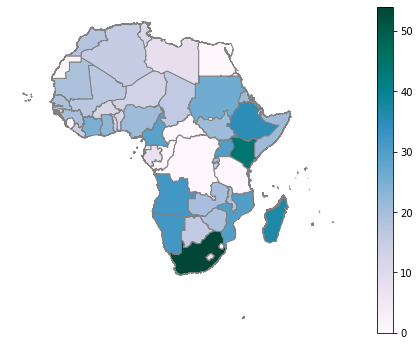

In [35]:
# Choropleth Maps for Threatened Birds
fig, ax = plt.subplots(1, figsize=(10,6))
imd_merged.plot(column='Bird_Threatened_Value', edgecolor='grey', cmap='PuBuGn', linewidth=1, ax=ax, legend = True)
ax.axis('off')

***Choropleth Maps for Clean Energy Accessing :***

(-29.801817316449938, 67.94571903411688, -51.20849617474568, 41.78807067458816)

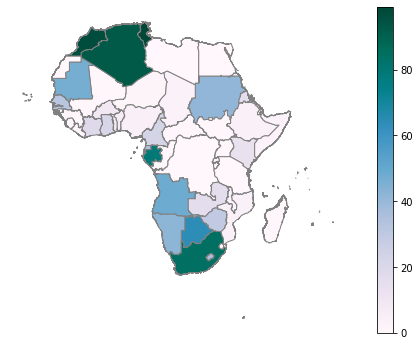

In [36]:
fig, ax = plt.subplots(1, figsize=(10,6))
imd_merged.plot(column='Clean_Energy_Value', edgecolor='grey', cmap='PuBuGn', linewidth=1, ax=ax, legend = True)
ax.axis('off')

***Interpretation:***

<font color='blue'> Comparing Choropleth map corrosponding to Moran Plot :</font>

At the start of the Task 4 (above), I have explained my color blindness reseach and why I choose using the blue green color to help the color-blindness to read my choropleth map. The following is explaining the findings for the map contents:


In terms of my SDG 15 (Bird Threatened Question): 

It can be seen that the major threatened bird species are concentrated in the eastern and southern countries, and for some low bird-threatened-value countries like "The Central African Republic" and “The People's Republic of Congo” is surrounded by major high-threatened-value countries. This phenomenon also corresponds to the data distribution in the Maron chart. In the 2nd quadrant of the Maron chart, the points with the **LH** value are clustered, which means that these **LH** points represented countries are geographically surrounded by high values countries. Besides, The **LL** value points in the 3rd quadrant of the Moran map are very clustered in a small area, indicating that many countries with low spatial lag values are close to each other geographically. This has been verified from the choropleth map. A large number of **LL** countries are concentrated on the northwest side of the map. The birds in Northwest Africa are far less threatened than those in the Southeast.


In terms of my SDG 7 (Accessing to clean fuels and technologies for cooking): 

It can be seen from the choropleth map that North Africa countries and South African countries are the regions with the highest proportion of clean energy for cooking. However, due to the far geographical distance between these two regions, corresponding to the distance between the points in the first quadrant **(HH)** of the Moran chart is also relatively sparse, this can be verified. Besides, Central and East African countries have concentrated a large number of countries with low clean energy utilization. These countries are very close geographically. This can be seen in the 3rd quadrant of the Moran chart ie. The distance between **(LL)** points is very close and dense. Only a few 2-3 scattered countries with high clean energy use are surrounded by a large number of low-value countries, but the geographical distance between them is relatively long, so the **(HL)** values displayed in the 4th quadrant of the Moran chart are scattered and few.



## Task 5: Report

You visualized two variables related to your research questions. How would you interpret your findings and how does it help you to answer your research questions? 

Which extra variables would you like to use? What information are you missing in your current data? What kind of data could you use to improve your analysis?

Try to answer your research questions and don't shy away from suggesting future research. 

***Answer your research questions in 200-400 words:***

In summary, I learned 2 important concepts in this homework:

**Concept 1:** A spatial lag is a variable that averages the. neighbouring values of a location.

**Concept 2:** Moran index is used to describe the average degree of association between a single spatial unit and the surrounding area.

And these two concepts both based a theory: 'Everything is related to everything else, but near things are more related to each other'-- Waldo R. Tobler

The specific findings about the spatial lag value distribution and chorpleth map have been interpreted at the end of task3 and 4, so I won't elaborate here. Here I mainly focus on my Summary Findings & Reflection:

***(1) Summary Findings：*** No matter what kind of spatial weight extraction method (knn, queen, rook, block) is to find the commonalities of closed geographical locations in space. Through the calculation of the *’spatial lag‘* and the distribution analysis of the *’Moran value‘*, it can help us find the commonality between the spatial entities. In addition, the distribution of spatial lag in the moran chart corresponds to the change in the value of the choropleth map. The choropleth map allows the human eye to see the value change intuitively, but the moran can help people explore more relevant insight. 

In the Moran chart, the distribution of points in the four quadrants represents the geographical relationship between the high and low values in the four. The more points in the 1st quadrant, the more concentrated it indicates that the high-value **(HH)** entities are geographically closer and clustered, and vice versa. The 3rd quadrant clustering indicates that low-value **(LL)** entities are clustered and close together. The 2nd and 4th quadrants represent low values surrounded by high values **(LH)** or high values surrounded by low values **(HL)**.

After comparing the standard Moran figure, we could find that for the same research problem, the spatial lag score distribution from both the blocked weights method and the KNN method is highly similar in four quadrants. This phenomenon explains that the countries connected by KNN are actually a kind of regional block to a certain extent because they are close to each other.


***(2) Reflection：***: There are still some defects in my experiment. For example, it is very difficult to find complete data for each country of different year from the World Bank. Therefore, the original data and some of the data are missing (NaN). In order to solve this problem, I use 0 to fill in the missing countries' data, but this will bring prediction error to the real SDG situation. So maybe using the supplementary with avaerage value instead of 0  will make the analysis results more reliable.


***(3) Future Research:*** In the process of searching data, we can find that there are many years of data for the same research question. Therefore, on the basis of this project, we can present the choropleth map not only with 1-year data, but a dynamic multi-year data. It can also be provided for user interaction. This method is explained in some Blogs, for example: https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0, this Can be a good research direction.
